# Team:

# 1. Nirav Jadeja - B00789139
# 2. Supriya Patel - B00791627

# Question 1

### Implement a multi-layer perceptron (MLP) with Sklearn or Keras to memorize the digital letters given in file pattern1 into the corresponding ASCII representation. In the file, each letter of the alphabet is represented by a matrix of 12x13 binary values so that each consecutive 12 rows represent one letter. Plot a training curve (the performance of the model on the training data) and interpret your results.

Importing modules and reading data

In [1]:
import numpy as np
from keras import models, layers, optimizers, utils
from random import randint
from keras.layers.core import Activation
from keras.layers import Dropout
from matplotlib import pyplot as plt

dataset = np.loadtxt('pattern1.txt', delimiter=" ")

C:\Users\nirav\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


applying data transformation

In [2]:
def oneRowTransform(dataset):
    
    temp = []
    x_data = []
    startIndex = 0
    distance = 12
    endIndex = distance

    for i in range (int(len(dataset)/12)): 
    
        temp = dataset[startIndex: endIndex]
        startIndex = endIndex
        endIndex = startIndex + distance
        x_data.append(temp)
        temp = []
        
    x_temp = []
    for number in range(len(x_data)):
        flat_list = [item for sublist in x_data[number] for item in sublist]
        x_temp.append(flat_list)
        
    return x_temp

x_temp = oneRowTransform(dataset)

x_test, y_test  = [], []
y_data = utils.to_categorical(list(range(65,91))).tolist()

tempList_x = list(x_temp)
tempList_y = list(y_data)

splitting train and test data. Further transformation operation 

In [3]:
for i in range(8):
    randomNumber = randint(0, len(x_temp)-1)
    x_test.append(x_temp[randomNumber])
    y_test.append(y_data[randomNumber])
    x_temp.pop(randomNumber)
    y_data.pop(randomNumber)
    
x_train = np.array(tempList_x).reshape(26,156)
x_test = np.array(x_test).reshape(8,156)

y_train = np.array(tempList_y)
y_test = np.array(y_test)

general model function

In [4]:
def MLPmodel(node, x_train, y_train, x_test, y_test, epochs, batch_size):
    
    model = None
    model = models.Sequential()
    
    model.add(layers.Dense(node, input_dim=156))
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    
    model.add(layers.Dense(node))
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    
    model.add(layers.Dense(91))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.Adadelta(), metrics=['accuracy'])
    
    test = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    prediction = model.predict_classes(x_test, verbose=0)
    
    return test, score, prediction, model

Graph Functions

In [5]:
def lineGraph(firstValue, secondValue, firstMarker, secondMarker,
               lineOne, lineTwo, colorOne, colorTwo, title, 
               labelOne, labelTwo, x_label, y_label):
    
    plt.plot(firstValue, marker=firstMarker, linestyle=lineOne, 
                 color=colorOne, label=labelOne)
    plt.plot(secondValue, marker=secondMarker, linestyle=lineTwo, 
                 color=colorTwo, label=labelTwo)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()
    
def barGraph(labels, values, width, x_label, y_label, title):
    plt.bar(labels, values, width=width)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

Building the Model

In [6]:
test, score, prediction, model = MLPmodel(128, x_train, y_train,
                                   x_test, y_test, 25, 10)  

print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               20096     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 91)                11739     
__________

Plotting the Graph (Train Accuracy VS Validation Accuracy)

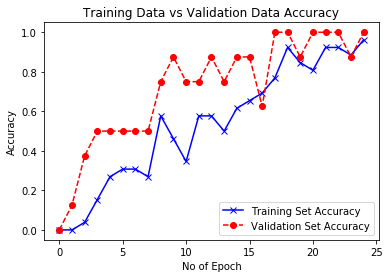

In [7]:
lineGraph(test.history['acc'], test.history['val_acc'], 'x', 'o', 
          '-','--', 'b','r', 'Training Data vs Validation Data Accuracy',
         'Training Set Accuracy','Validation Set Accuracy','No of Epoch','Accuracy')

#### Here, we can say that validation accuracy is higher than the training set which means data is not overfitting. At one stage is reaches steady state.

# Question 2

### Investigate how good the network can generalize to noisy versions of the patterns. Explain your implementation of noise and report your results. Show an example where you plot the training and generalization curve together in a plot.

Noisy Data Explanation

#### Here, we have taken 5 samples on E letter (ASCII: 69) and added noise in such a way that it looks as other letters as well.
#### In first sample we have modified it data and it looks as letter B (ASCII: 66) and other 4 letters are modified variants of E and feed this test data to the model (trained with noise free data).

#### Data File: NoisyTestData.txt

Data transformation 

In [8]:
testDataWithNoise = np.loadtxt('NoisyTestData.txt', delimiter=" ")

x_train = np.array(oneRowTransform(dataset)).reshape(26,156)
y_train = utils.to_categorical(np.array(list(range(65,91))).reshape(26,1))

# testing (NOISE ADDED) data 
x_test = np.array(oneRowTransform(testDataWithNoise)).reshape(5,156)
y_test = np.array([y_train[1], y_train[4],y_train[4],y_train[4],y_train[4]])

In [9]:
test, score, prediction, model = None, None, None, None
test, score, prediction, model = MLPmodel(128, x_train, y_train,
                                   x_test, y_test, 25, 10)  

print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               20096     
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 91)                11739     
__________

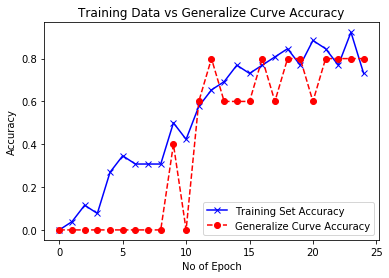

In [10]:
lineGraph(test.history['acc'], test.history['val_acc'], 'x', 'o', 
          '-','--', 'b','r', 'Training Data vs Generalize Curve Accuracy',
         'Training Set Accuracy','Generalize Curve Accuracy','No of Epoch','Accuracy')

In [11]:
print("Predicted letters are: ",prediction)

Predicted letters are:  [69 69 69 69 69]


#### Here, first letter should have been identified correctly. But, here we don't have enough data so it doesn't have many variation in Letter B (ASCII 66). Otherwise it has detected all noisy letters correctly so we can say that once model is trained with clean data it is more immune to noise.

# Question 3

### Which letter is represented in file pattern2?

In [12]:
pattern2 = np.loadtxt('pattern2.txt', delimiter=" ")

x_pattern2data = np.array(oneRowTransform(pattern2)).reshape(1,156)

In [13]:
prediction = model.predict_classes(x_pattern2data, verbose=0) 

print ("Letter in pattern 2 is: ", prediction)

Letter in pattern 2 is:  [75]


### Letter in pattern 2 is 75 (ASCII) or K.

# Question 4

### Investigate the network performance when training on noisy patterns. Also, how does the number of hidden nodes influence the performance?

#### In this case, we will train our model with some noisy data. we have added noise in letter K, L, P, U, Z. We have modified these letter in a way that K looks similar to R, L to U, p to R, U to O and Z with random places. Further, we have prepared to test data (Noisy one and Clean one) with having all these 5 letters. 

#### Files:
#### Noisy Train Data: NoisyTrainData.txt
#### Noisy Test Data: NoisyTestData2.txt
#### Clean Data: TestData.txt

Loading Noisy data for training and test and clean test data

In [26]:
NoisyTrainData = np.loadtxt('NoisyTrainData.txt', delimiter=" ")
NoisyTestData = np.loadtxt('NoisyTestData2.txt', delimiter=" ")
TestData = np.loadtxt('TestData.txt', delimiter=" ")

Data Transformation

In [27]:
# training data
x_train = np.array(oneRowTransform(NoisyTrainData)).reshape(26,156)
y_train = utils.to_categorical(np.array(list(range(65,91))).reshape(26,1))

# testing (NOISE ADDED) data 
x_noisytestdata = np.array(oneRowTransform(NoisyTestData)).reshape(5,156)
y_test = np.array([y_train[10], y_train[11],y_train[15],y_train[20],y_train[25]])
  
# clean test data
x_cleantestdata = np.array(oneRowTransform(TestData)).reshape(5,156)

First testing on Noisy Train Data vs Noisy Test Data

In [28]:
model = None
testOnNoisyData, ScoreNoisyData256, PredictionNoisyData, model = MLPmodel(256, x_train, y_train,
                                                             x_noisytestdata, y_test, 25, 10)  

print('Test loss on Noisy Test Data:', ScoreNoisyData256[0])
print('Test accuracy on Noisy Test Data:', ScoreNoisyData256[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               40192     
_________________________________________________________________
activation_31 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_32 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 91)                23387     
__________

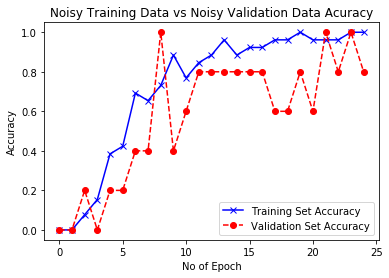

In [29]:
lineGraph(testOnNoisyData.history['acc'], testOnNoisyData.history['val_acc'], 'x', 'o', 
          '-','--', 'b','r', 'Noisy Training Data vs Noisy Validation Data Acuracy',
         'Training Set Accuracy','Validation Set Accuracy','No of Epoch','Accuracy')

Now Testing Clean Data vs Train Data

In [30]:
model = None
testOnCleanData, ScoreCleanData256, PredictionCleanData, model = MLPmodel(256, x_train, y_train,
                                                             x_noisytestdata, y_test, 25, 10)  

print('Test loss on Clean Test Data:', ScoreCleanData256[0])
print('Test accuracy on Clean Test Data:', ScoreCleanData256[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               40192     
_________________________________________________________________
activation_34 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_35 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 91)                23387     
__________

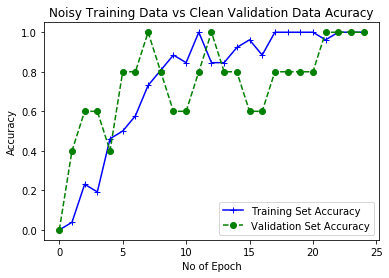

In [45]:
lineGraph(testOnCleanData.history['acc'], testOnCleanData.history['val_acc'], '+', 'o', 
          '-','--', 'b','g','Noisy Training Data vs Clean Validation Data Acuracy',
         'Training Set Accuracy','Validation Set Accuracy','No of Epoch','Accuracy')

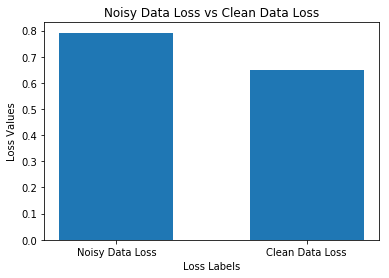

In [32]:
loss_values = [ScoreNoisyData256[0], ScoreCleanData256[0]]
loss_labels = ['Noisy Data Loss','Clean Data Loss']
barGraph(loss_labels, loss_values, 0.6, 'Loss Labels',
         'Loss Values','Noisy Data Loss vs Clean Data Loss')

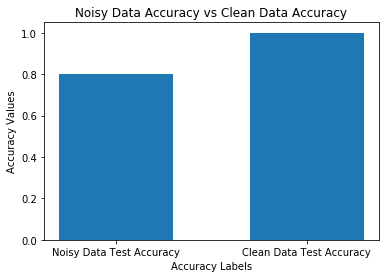

In [33]:
accuracy_values = [ScoreNoisyData256[1], ScoreCleanData256[1]]
accuracy_labels = ['Noisy Data Test Accuracy','Clean Data Test Accuracy']
 
barGraph(accuracy_labels, accuracy_values, 0.6, 'Accuracy Labels',
         'Accuracy Values','Noisy Data Accuracy vs Clean Data Accuracy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 128)               20096     
_________________________________________________________________
activation_127 (Activation)  (None, 128)               0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_128 (Dense)            (None, 128)               16512     
_________________________________________________________________
activation_128 (Activation)  (None, 128)               0         
_________________________________________________________________
dropout_86 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_129 (Dense)            (None, 91)                11739     
__________

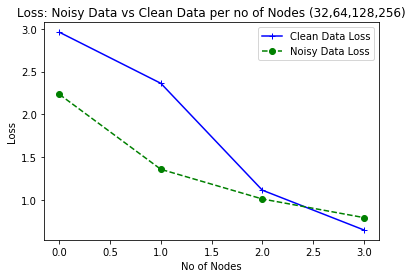

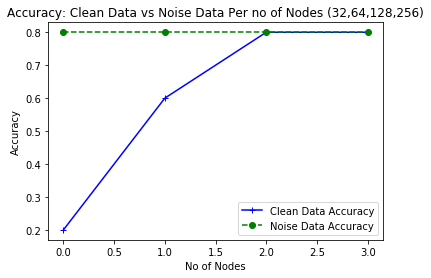

In [48]:
model = None
testOnNoisyData128, ScoreNoisyData128, PredictionNoisyData128, model = MLPmodel(128, x_train, y_train,
                                                             x_noisytestdata, y_test, 25, 10)  

model = None
testOnCleanData128, ScoreCleanData128, PredictionCleanData128, model = MLPmodel(128, x_train, y_train,
                                                             x_noisytestdata, y_test, 25, 10)  

model = None
testOnNoisyData64, ScoreNoisyData64, PredictionNoisyData64, model = MLPmodel(64, x_train, y_train,
                                                             x_noisytestdata, y_test, 25, 10)  

model = None
testOnCleanData64, ScoreCleanData64, PredictionCleanData64, model = MLPmodel(64, x_train, y_train,
                                                             x_noisytestdata, y_test, 25, 10)  

model = None
testOnNoisyData32, ScoreNoisyData32, PredictionNoisyData32, model = MLPmodel(32, x_train, y_train,
                                                             x_noisytestdata, y_test, 25, 10)  

model = None
testOnCleanData32, ScoreCleanData32, PredictionCleanData32, model = MLPmodel(32, x_train, y_train,
                                                             x_noisytestdata, y_test, 25, 10)  


lossValueCleanData = [ScoreCleanData32[0],ScoreCleanData64[0],ScoreCleanData128[0],ScoreCleanData256[0]]
lossValuesNoisyData = [ScoreNoisyData32[0],ScoreNoisyData64[0],ScoreNoisyData128[0],ScoreNoisyData256[0]]

accuracyCleanData = [ScoreCleanData32[1],ScoreCleanData64[1],ScoreCleanData128[1],ScoreCleanData128[1]]
accuracyNoisyData = [ScoreNoisyData32[1],ScoreNoisyData64[1],ScoreNoisyData128[1],ScoreNoisyData256[1]]

lineGraph(lossValueCleanData, lossValuesNoisyData, '+', 'o', 
          '-','--', 'b','g','Loss: Noisy Data vs Clean Data per no of Nodes (32,64,128,256)',
         'Clean Data Loss','Noisy Data Loss','No of Nodes','Loss')

lineGraph(accuracyCleanData, accuracyNoisyData, '+', 'o', 
          '-','--', 'b','g','Accuracy: Clean Data vs Noise Data Per no of Nodes (32,64,128,256)',
         'Clean Data Accuracy','Noise Data Accuracy','No of Nodes','Accuracy')

#### In this case, we can say that clean data is performing better than the noisy version of data as a test set.
#### Loss value is significant less in clean data test.
#### It is always better to deal with the noise first before applying to the model whether it is testing data or training data. By accounting all numbers, The model which is trained with clean data is performing good but it can be better with more data applied.
#### We have run model though 32, 64, 128, 256 nodes value, both clean and noisy test data. we can say that less number of nodes means high loss value. From the graph, as the number of nodes increases, loss value will decreased gradually. There is almost no change on accuracy.

# Question 5

### Take a photograph of your team members and apply an edge filter to it. Show the original photo and the filtered images. Your submission has to show the program.

Importing modules and reading images

In [37]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

img = io.imread('image.jpg')
img = color.rgb2gray(img)   
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

Displaying original image

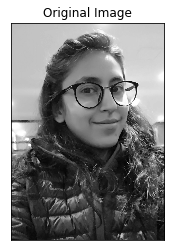

In [39]:
plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

Displaying egde filtered image

C:\Users\nirav\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


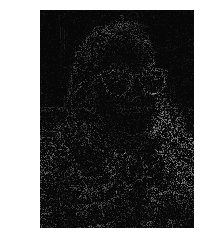

Output image is saved


In [44]:
edges = scipy.signal.convolve2d(img, kernel, 'valid')
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

image_sharpen = scipy.signal.convolve2d(edges_equalized, kernel, 'same')
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(edges_equalized, cmap=plt.cm.gray)    

scipy.misc.imsave('output.jpg', edges_equalized)
plt.axis('off')
plt.show()
print('Output image is saved')

# Question 6

### Possible Errors

### 1. No indentation in for loop on Page 70, 78

### 2. Possible wrong figure number is given in page (Section 4.5 4th Line) > ('Some Examples are shown in Fig. 4.10 on top')

#### Pictures are attached for your reference.

# References:

### 1. Class Notes, Menuscript and sample code provided by the professor
### 2. Keras Official Documentation 
### 3. Deep Learning with Python by Francois Chollet